In [1]:
import skfuzzy as fuzz 
from skfuzzy import control as ctrl
import numpy as np

In [2]:
room_temperature = ctrl.Antecedent(np.arange(10,51,1), label = 'room_temperature')
people = ctrl.Antecedent(np.arange(0,21,1), label = 'people')
cooling_power = ctrl.Consequent(np.arange(0,51,1), label= 'cooling_power')

In [3]:
room_temperature['very_cold'] = fuzz.trapmf(room_temperature.universe,[10,10,15,18])
room_temperature['cold'] = fuzz.trimf(room_temperature.universe,[16,21,26])
room_temperature['normal'] = fuzz.trimf(room_temperature.universe,[24,29,34])
room_temperature['warm'] = fuzz.trimf(room_temperature.universe,[32,36,40])
room_temperature['hot'] = fuzz.trapmf(room_temperature.universe,[40,45,50,50])

c:\Users\Elzoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


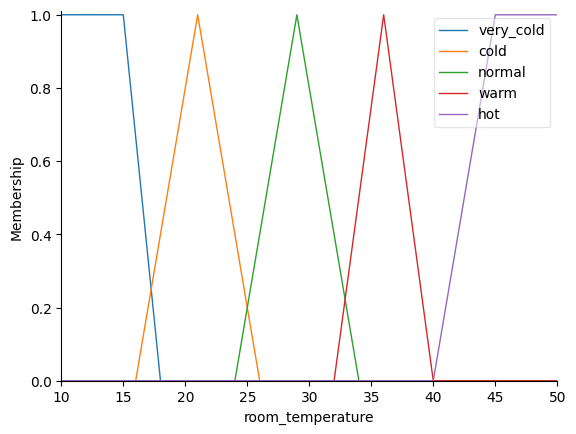

In [4]:
room_temperature.view()

In [5]:
people['empty'] = fuzz.trapmf(people.universe, [0, 0, 1, 2])
people['few'] = fuzz.trimf(people.universe,[1,4,6])
people['moderate'] = fuzz.trimf(people.universe,[5,8,12])
people['crowded'] = fuzz.trapmf(people.universe,[10,13,20,20])


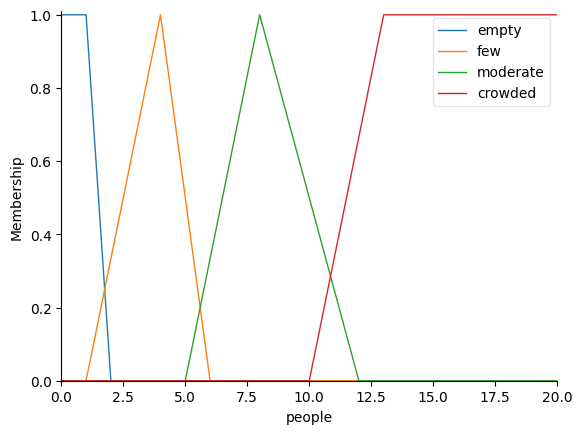

In [6]:
people.view()

In [7]:
cooling_power['off'] = fuzz.trapmf(cooling_power.universe, [0, 0, 2, 5])
cooling_power['low'] = fuzz.trimf(cooling_power.universe, [3, 10, 17])
cooling_power['comfortable'] = fuzz.trimf(cooling_power.universe, [15, 25, 35])
cooling_power['strong'] = fuzz.trimf(cooling_power.universe, [30, 40, 45])
cooling_power['max'] = fuzz.trapmf(cooling_power.universe, [43, 47, 50, 50])

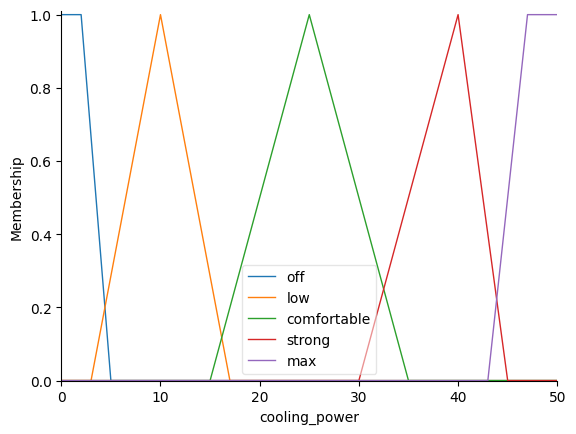

In [8]:
cooling_power.view()

In [9]:
rule1 = ctrl.Rule(room_temperature['normal'] & people['moderate'], cooling_power['comfortable'])
rule2 = ctrl.Rule(room_temperature['normal'] & people['crowded'], cooling_power['strong'])
rule3 = ctrl.Rule(room_temperature['warm'] & people['moderate'], cooling_power['strong'])
rule4 = ctrl.Rule(room_temperature['warm'] & people['crowded'], cooling_power['max'])

In [10]:
ac_control_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4])

In [11]:
ac_control_system_simulator = ctrl.ControlSystemSimulation(ac_control_system)

In [12]:
ac_control_system_simulator.input['people'] = 11
ac_control_system_simulator.input['room_temperature'] = 33

In [17]:
μ_temp_very_cold = fuzz.interp_membership(room_temperature.universe, room_temperature['very_cold'].mf, 33)
μ_temp_cold = fuzz.interp_membership(room_temperature.universe, room_temperature['cold'].mf, 33)
μ_temp_normal = fuzz.interp_membership(room_temperature.universe, room_temperature['normal'].mf, 33)
μ_temp_warm = fuzz.interp_membership(room_temperature.universe, room_temperature['warm'].mf, 33)
μ_temp_hot = fuzz.interp_membership(room_temperature.universe, room_temperature['hot'].mf, 33)

μ_people_empty = fuzz.interp_membership(people.universe, people['empty'].mf, 11)
μ_people_few = fuzz.interp_membership(people.universe, people['few'].mf, 11)
μ_people_moderate = fuzz.interp_membership(people.universe, people['moderate'].mf, 11)
μ_people_crowded = fuzz.interp_membership(people.universe, people['crowded'].mf, 11)

# Print the memberships
print("\nFuzzification Results:")
print(f"Room Temp = 33°C:")
print(f"  Very Cold:     {μ_temp_very_cold:.2f}")
print(f"  Cold:          {μ_temp_cold:.2f}")
print(f"  Normal:        {μ_temp_normal:.2f}")
print(f"  Warm:          {μ_temp_warm:.2f}")
print(f"  Hot:           {μ_temp_hot:.2f}")

print(f"\nNumber of People = 11:")
print(f"  Empty:         {μ_people_empty:.2f}")
print(f"  Few:           {μ_people_few:.2f}")
print(f"  Moderate:      {μ_people_moderate:.2f}")
print(f"  Crowded:       {μ_people_crowded:.2f}")


Fuzzification Results:
Room Temp = 33°C:
  Very Cold:     0.00
  Cold:          0.00
  Normal:        0.20
  Warm:          0.25
  Hot:           0.00

Number of People = 11:
  Empty:         0.00
  Few:           0.00
  Moderate:      0.25
  Crowded:       0.33


In [13]:
ac_control_system_simulator.compute()

In [14]:
result = ac_control_system_simulator.output['cooling_power']

In [15]:
print(f'result: {round(result,1)}%')

result: 33.9%


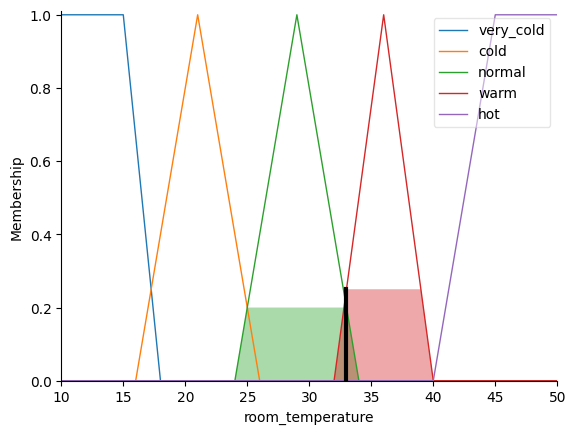

In [16]:
room_temperature.view(ac_control_system_simulator)